<a href="https://colab.research.google.com/github/Professor-Shin/CS-Class-Project/blob/main/Quantum_Computing/QNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-machine-learning qiskit-algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
!pip install qiskit['visualization']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3d5a57d85aa64aeab188da14905cdf98ab9f3aacc4e2d706ab24ea75cf8d17d0
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


## **Dataset**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # scaling data

In [ ]:
X = iris['data']
y = iris['target']

scaler = MinMaxScaler(feature_range=(0,np.pi))
X = scaler.fit_transform(X)

# print(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## **Implement Quantum**

In [ ]:
num_qubits = 4 # depends on number of features

In [ ]:
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit

def feature_map(n_qubits, reps=1, entanglements='linear'): # May use instead ZZfeature_map
  x = ParameterVector('x', n_qubits)
  qc = QuantumCircuit(n_qubits)

  for i in range(reps):
    for q in range(n_qubits):
      qc.rz(x[q], q)
      if entanglements == 'linear' :
        for q in range(n_qubits-1):
          qc.cx(q, q+1) # CNOT
      elif entanglements == 'full':
        for j in range(n_qubits):
          for k in range(j):
            qc.cx(k, j)
  return qc

### **Encode classical to quantum information (Data Encoding Layer)**

In [ ]:
from qiskit.circuit.library import ZZFeatureMap # Encoding by rotaiton gate Z

feature_map = ZZFeatureMap(feature_dimension = num_qubits, reps=2, entanglement='linear') # reps = repetitions จำนวนการซ้ำของ layers

### **Parameterization circuit layer**

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='linear')

**Adjust**

In [ ]:
input_params = list(feature_map.parameters) # classical
weight_params = list(ansatz.ordered_parameters) # encoded
print(input_params)
print(weight_params)

[ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]
[ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7])]


## **Quantum Nueral Network Circuit**

**Circuit**

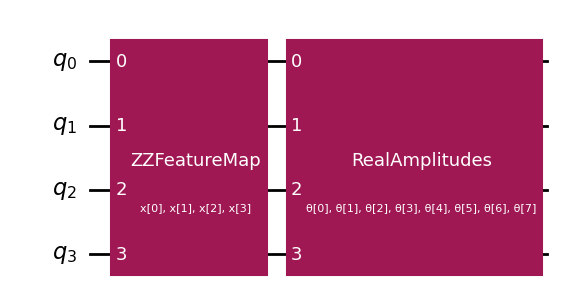

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(num_qubits)
qc.append(feature_map, range(num_qubits))
qc.append(ansatz, range(num_qubits))

qc.draw(output='mpl')

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import StatevectorSampler
from qiskit_algorithms.gradients import ParamShiftSamplerGradient

In [ ]:
output_shape = 3 # มีสามสายพันธุ์
interpret = lambda x: x % output_shape # แปลงค่าเป็นสายพันธุ์

**Network**

In [ ]:
sampler = StatevectorSampler()
gradient_sampler = ParamShiftSamplerGradient(sampler)

qnn = SamplerQNN(circuit = qc,
                 input_params = input_params,
                 weight_params = weight_params,
                 sampler = sampler, # state vector
                 interpret=interpret, # call function
                 output_shape = output_shape,
                 gradient = gradient_sampler,
                 input_gradients = False)

## **Model - Hybrid Nueral Network**

In [ ]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import GradientDescent

model = NeuralNetworkClassifier(qnn, optimizer=GradientDescent(maxiter=100), one_hot=True, loss='cross_entropy')

In [ ]:
model.fit(X_train, y_train)

## **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy_score(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.36      0.44      0.40         9
           2       0.40      0.36      0.38        11

    accuracy                           0.47        30
   macro avg       0.48      0.47      0.47        30
weighted avg       0.48      0.47      0.47        30

